<a href="https://colab.research.google.com/github/Ashvitha01/Image-processing/blob/main/imageipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("dogs",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/dogs


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://3.bp.blogspot.com/-OukFe37JYNs/UOgOYK-e06I/AAAAAAAABLY/Jjzbht9nA9g/s1600/89663-wallpapers-cute-dogs.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://funpeep.com/wp-content/uploads/2015/11/cute-pictures-of-dogs.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://3.bp.blogspot.com/-rZLNmejmRws/VjA-3BVb82I/AAAAAAAABL8/CVlp7STDj6s/s1600/Dog-breed-Australian-Cattle-Dog.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://2.bp.blogspot.com/-IQCx6UirdFg/UW7G-UF9ieI/AAAAAAAAAGg/VQZC7emyk4o/s1600/holly.JPG
[%] File Downloaded !

[%] Downloading Image #5 from http://3.bp.blogspot.com/-ZMpwMhvN1vc/VFZ330hGsBI/AAAAAAABN2A/92P-ImlDTmI/s1600/cute-dogs-045-18.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i1.wp.com/braincharm.com/wp-content/uploads/2017/11/Dog.jpg?fit=1920%2C1080&amp;ssl=1
[%] File Down

In [ ]:
from bing_image_downloader import downloader
downloader.download("cats",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/cats


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.rd.com/wp-content/uploads/2019/11/cat-10-e1573844975155.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://3.bp.blogspot.com/-pZMZb0rC6qI/UTHNYH7mi7I/AAAAAAAAAPA/m_VYPjtLG8w/s1600/cat.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.wallpaperup.com/uploads/wallpapers/2013/07/28/124794/e83266dd94539d1e49cf52813b63d1ec.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.rover.com/blog/wp-content/uploads/2019/12/adorable-fluffy-cat.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://2.bp.blogspot.com/-WtdFq_e6eKo/TV5W5s-hS-I/AAAAAAAAAvM/gmCUYOx3bX8/s1600/Animals_Cats_Small_cat_005241_.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.rd.com/wp-content/uploads/2019/05/american-curl-kitten.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://wallup.net/

In [ ]:
from bing_image_downloader import downloader
downloader.download("lotus",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/lotus


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://media.buzzle.com/media/images-en/gallery/botany/flowers/1200-481253425-light-pink-lotus-flower.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://1.bp.blogspot.com/-lLAeyhqAoqI/VK_nRQmO6bI/AAAAAAAAy70/AZ945yw93kg/s1600/lotus-flower.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.hdwallpaper.nu/wp-content/uploads/2015/10/lotus_wallpaper_001.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.hdwallpaper.nu/wp-content/uploads/2015/10/lotus_wallpaper_011.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://hinduismfacts.org/wp-content/uploads/2011/03/Blue-Lotus.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://allhdwallpapers.com/wp-content/uploads/2015/07/Lotus-8.jpg
[!] Issue getting: http://allhdwallpapers.com/wp-content/uploads/2015/07/Lotus-8.jpg
[!] Error:: [Errno 1

In [ ]:
#preprocessing
#Resize
#flatten



import os
import matplotlib
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt


target= []
images= []
flat_data= []

DATADIR='/content/images'
CATEGORIES= ['cats','dogs','lotus']

for category in CATEGORIES:
    class_num= CATEGORIES.index(category)
    path= os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array= imread(os.path.join(path,img))
        #print(img_array.shape)
       # plt.imshow(img_array)
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
#Spilt data into Training and Testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from tifffile.tifffile import svs_description_metadata
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
               {'C':[1,10,100,1000],'kernel':['linear']},
               {'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [ ]:
#save the model using Pickle library

import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://th.bing.com/th/id/OIP.t4Eap5pvLnShnV2TP5UpdgHaDd?w=339&h=163&c=7&r=0&o=5&dpr=1.3&pid=1.7
(211, 440, 3)
 PREDICTED OUTPUT:dogs


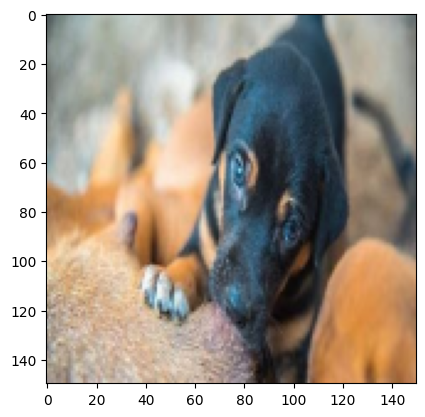

In [ ]:
#testing a brand a new Image

flat_data=[]
url = input('Enter your URL')
img = imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT:{y_out}')

!pip install streamlit -q

In [ ]:
%%writefile app.py

import streamlit as st

import os
import matplotlib
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import pickle
from PIL import Image

st.title('Image Classifier')
st.text('upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader('Choose an image...',type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICTE'):
    CATEGORIES= ['cats','dogs','lotus']
    st.write('Result..')
    flat_data=[]
    img = np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.write(f' PREDICTED OUTPUT: {y_out}')

Writing app.py


In [ ]:
!pip install pyngrok==4.1.1.

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15964 sha256=c7b5313318745174423e4f5f72dbd5a82ee6caf9e244605e391127ce109cf496
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok


In [ ]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.935s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



In [ ]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

34.138.226.215
npx: installed 22 in 3.354s
your url is: https://eighty-papayas-scream.loca.lt
